In [ ]:
# final histogram : recap with best results for each relation

In [3]:
import json
import logging
import os
import pandas as pd

with open('config.json', 'r') as f:
    config = json.load(f)

path = config['working_dir']

input_dir = os.path.join(path,'RESULTS_FINAL')
print('input_dir:',input_dir)
output_dir = os.path.join(path,'RESULTS_FINAL/OVERALL_BEST')
print('output_dir:',output_dir)

output_tmp_file = os.path.join(output_dir, 'best_results.csv')
print('output_tmp_file:',output_tmp_file)
output_histogram_file = os.path.join(output_dir, 'histogram_best_results.png')
print('output_histogram_file:',output_histogram_file)

# os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

input_dir: /Users/francescamartinucci/tesi/RESULTS_FINAL
output_dir: /Users/francescamartinucci/tesi/RESULTS_FINAL/OVERALL_BEST
output_tmp_file: /Users/francescamartinucci/tesi/RESULTS_FINAL/OVERALL_BEST/best_results.csv
output_histogram_file: /Users/francescamartinucci/tesi/RESULTS_FINAL/OVERALL_BEST/histogram_best_results.png


In [50]:
lp = ['BINARY', 'MULTICLASS']
classificatori = ['forest', 'tree']
embedders = {'line': 'undirected', 'node2vec': 'undirected', 'transe': 'directed'}
model_dict = {
    'bert': ['BERT','BERT100','_100'],
    'naive100': ['naive100','naive100',''],
    'text-embedding-3-small': ['openai','openai100','_100']
}
concat_number = ['100', '0', '100'] # solo i concatenati (bert e openai) hanno 100 dopo il nome

results = {}

for l in lp:
    for modello, r in model_dict.items():
        # for classificatore in classificatori:
        for embedder, direction in embedders.items():
            # prefisso_input_file = r[0]
            prefisso = r[1]
            val_concat = r[2]
            # input_file_name = f"{os.path.join(input_dir,l, modello)}/{prefisso_input_file}_{embedder}{val_concat}_{classificatore}_{l.lower()}_{direction}.csv"
            file_name = f"{os.path.join(input_dir,l, modello)}/results/tmp_results_{prefisso}_{embedder}_final.csv"
            # print(file_name)
            df = pd.read_csv(file_name) #, index_col='Coppia di tipi'
            # df = df.loc[df['Modello'] == 'RandomForest'] # random forest è sempre il migliore

            df['id'] = f'{l.lower()}_{modello}_{embedder}' # predispongo id invece di creare un dizionario di dataframes, creo un dataframe unico

            results[f'{l.lower()}_{modello}_{embedder}'] = df #riempie il dizionario 
            
print('results:', results.keys())

# Concatena tutti i DataFrame in un unico DataFrame
final_df = pd.concat(results.values(), axis=0)
final_df.reset_index(drop=True, inplace=True)
final_df

results: dict_keys(['binary_bert_line', 'binary_bert_node2vec', 'binary_bert_transe', 'binary_naive100_line', 'binary_naive100_node2vec', 'binary_naive100_transe', 'binary_text-embedding-3-small_line', 'binary_text-embedding-3-small_node2vec', 'binary_text-embedding-3-small_transe', 'multiclass_bert_line', 'multiclass_bert_node2vec', 'multiclass_bert_transe', 'multiclass_naive100_line', 'multiclass_naive100_node2vec', 'multiclass_naive100_transe', 'multiclass_text-embedding-3-small_line', 'multiclass_text-embedding-3-small_node2vec', 'multiclass_text-embedding-3-small_transe'])


,Modello,Coppia di tipi,BA Positiva_mean,BA Positiva_std,BA Negativa_mean,BA Negativa_std,BA Complessiva_mean,BA Complessiva_std,id
0,RandomForest,Gene-Disease,0.897954,0.001553,0.889796,0.001587,0.893875,0.000964,binary_bert_line
1,RandomForest,Gene-Phenotype,0.792768,0.006084,0.826623,0.004492,0.809696,0.002514,binary_bert_line
2,RandomForest,miRNA-Disease,0.690938,0.002265,0.823270,0.002961,0.757104,0.001301,binary_bert_line
3,RandomForest,miRNA-Gene,0.701611,0.025134,0.628216,0.015264,0.664913,0.005257,binary_bert_line
4,RandomForest,miRNA-Phenotype,0.655586,0.019118,0.837762,0.005398,0.746674,0.006930,binary_bert_line
...,...,...,...,...,...,...,...,...,...
175,DecisionTree,Gene-Disease,0.732014,0.004936,0.711016,0.002533,0.721515,0.002313,multiclass_text-embedding-3-small_transe
176,DecisionTree,Gene-Phenotype,0.614783,0.005734,0.623850,0.002760,0.619317,0.003150,multiclass_text-embedding-3-small_transe
177,DecisionTree,miRNA-Disease,0.240147,0.002565,0.704426,0.003439,0.472287,0.001236,multiclass_text-embedding-3-small_transe
178,DecisionTree,miRNA-Gene,0.684660,0.115667,0.597758,0.003832,0.641209,0.058725,multiclass_text-embedding-3-small_transe


In [44]:
final_df.index

RangeIndex(start=0, stop=90, step=1)

In [51]:
# Trova il valore massimo di "BA Complessiva_mean" per ogni gruppo
max_values = final_df.groupby('Coppia di tipi')['BA Complessiva_mean'].idxmax()

# Visualizza il risultato
print(max_values)

Coppia di tipi
Gene-Disease        40
Gene-Phenotype      41
miRNA-Disease      142
miRNA-Gene          73
miRNA-Phenotype    144
Name: BA Complessiva_mean, dtype: int64


In [53]:
# Trova l'indice del massimo valore di "BA Complessiva_mean" per ogni coppia di tipi
best_results = final_df.loc[final_df.groupby('Coppia di tipi')['BA Complessiva_mean'].idxmax()]

best_results.to_csv(output_tmp_file, index=False)
best_results

,Modello,Coppia di tipi,BA Positiva_mean,BA Positiva_std,BA Negativa_mean,BA Negativa_std,BA Complessiva_mean,BA Complessiva_std,id
40,RandomForest,Gene-Disease,0.884521,0.002877,0.924151,0.007115,0.904336,0.004550,binary_naive100_node2vec
41,RandomForest,Gene-Phenotype,0.768406,0.012734,0.872870,0.008106,0.820638,0.010008,binary_naive100_node2vec
142,RandomForest,miRNA-Disease,0.893909,0.013952,0.786338,0.001612,0.840124,0.006724,multiclass_naive100_transe
73,RandomForest,miRNA-Gene,0.735078,0.020480,0.733702,0.014201,0.734390,0.003552,binary_text-embedding-3-small_node2vec
144,RandomForest,miRNA-Phenotype,0.855509,0.012027,0.807269,0.008241,0.831389,0.003083,multiclass_naive100_transe


# OVERALL HISTOGRAM

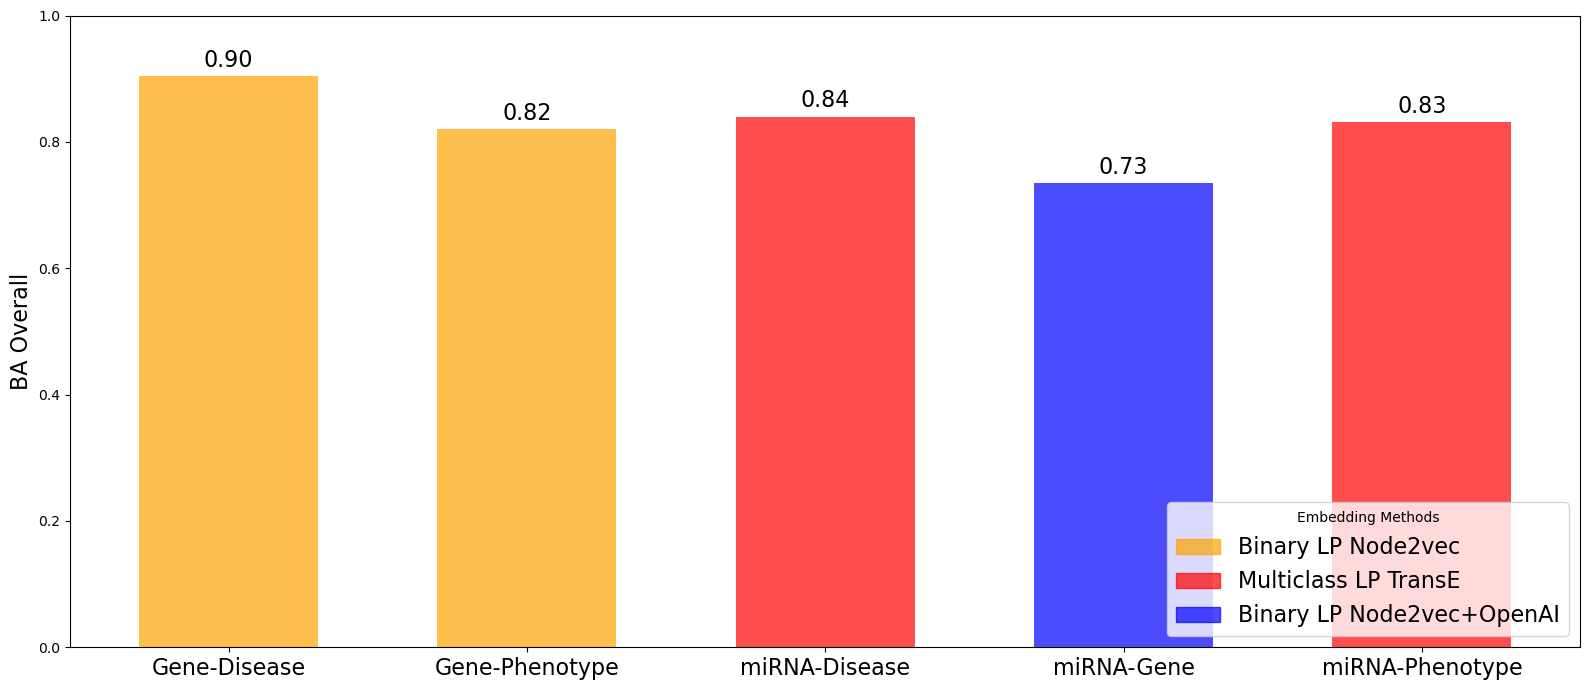

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Dati dal file CSV
data = pd.read_csv(output_tmp_file)

# Crea gli istogrammi
labels = data["Coppia di tipi"]
x = np.arange(len(labels))
width = 0.6  # Larghezza per ogni barra

# Colori distinti per ogni ID unico
unique_ids = data["id"].unique()
id_to_color = {'binary_naive100_node2vec': 'orange', 
 'multiclass_naive100_transe':'red',
 'binary_text-embedding-3-small_node2vec':'blue'}
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_ids)))  # Usa una mappa di colori
# id_to_color = {id: colors[i] for i, id in enumerate(unique_ids)}
# Dizionario di transcodifica x la legenda
id_to_label = {
    'binary_naive100_node2vec': 'Binary LP Node2vec',
    'multiclass_naive100_transe': 'Multiclass LP TransE',
    'binary_text-embedding-3-small_node2vec': 'Binary LP Node2vec+OpenAI'
}

fig, ax = plt.subplots(figsize=(16, 7))

# Crea le barre con colori basati sugli ID
bars = []
legend_entries = []

for i, (coppia, ba_mean, id_val) in enumerate(zip(data["Coppia di tipi"], data["BA Complessiva_mean"], data["id"])):
    bar = ax.bar(x[i], ba_mean, width, color=id_to_color[id_val], alpha=0.7)
    bars.append(bar)
    # Crea voci di legenda uniche
    if id_val not in legend_entries:
        legend_entries.append(id_val)

# Aggiungi etichette e titoli
ax.set_ylabel('BA Overall', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)

# Crea la legenda manualmente con i nomi leggibili
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=id_to_color[id_val], alpha=0.7) for id_val in legend_entries]
legend_labels = [id_to_label[id_val] for id_val in legend_entries]

ax.legend(legend_handles, legend_labels, loc='lower right', fontsize=16, title='Embedding Methods')

# # Crea la legenda manualmente
# legend_handles = [plt.Rectangle((0,0), 1, 1, color=id_to_color[id_val], alpha=0.7) for id_val in legend_entries]
# ax.legend(legend_handles, legend_entries, loc='lower right', fontsize=16, title='Embedding Methods')

# Mostra i valori numerici sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16)

for bar in bars:
    autolabel(bar)

# Mantieni l'asse y tra 0 e 1
ax.set_ylim(0, 1)

# Mostra il grafico
plt.tight_layout()
plt.show()

fig.savefig(output_histogram_file) 
